In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model

# Load training and testing data
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1]
y_traindf = pd.read_csv('y_train.csv')
X_traindf = pd.read_csv('X_train.csv')
X_testdf = pd.read_csv('X_test.csv')
# Lets have all the variables in the same dataframe
df = pd.read_csv('X_train.csv')
df['PRP'] = y_traindf['PRP']


# Fit model and predict test values
#y_pred = np.random.randint(y_train.min(), y_train.max(), X_test.shape[0])

# Arrange answer in two columns. First column (with header "Id") is an
# enumeration from 0 to n-1, where n is the number of test points. Second
# column (with header "EpiOrStroma" is the predictions.
#test_header = "Id,PRP"
#n_points = X_test.shape[0]
#y_pred_pp = np.ones((n_points, 2))
#y_pred_pp[:, 0] = range(n_points)
#y_pred_pp[:, 1] = y_pred
#np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
#           header=test_header, comments="")

# Note: fmt='%d' denotes that all values should be formatted as integers which
# is appropriate for classification. For regression, where the second column
# should be floating point, use fmt='%d,%f'.
    

**Note that it might be a good idea to transform one or more features into new features using basis functions. 
For instance, could the minimum and maximum memory features meaningfully be combined to one?**

Hyphotesis
==

- Combine other variables
- Try with the mean of MMAX and MMIN. Apply linear regression
- Calculate loss
- Cross validation. Divide train in 80%train 20%test
- Expected, covariance


In [2]:
#Reshape ytrain to be two columns
#ytrain = np.reshape(y_train,(len(y_train),1))
MYCT = X_train[:,0]
MMIN = X_train[:,1]
MMAX = X_train[:,2]
CACH = X_train[:,3]
CHMIN = X_train[:,4]
CHMAX = X_train[:,5]

**What variables should we consider? Are all of them important? Which ones are more correlated with the CPU performance?**

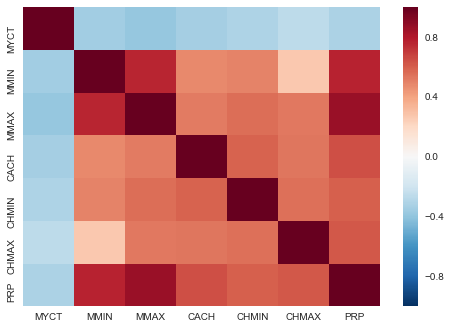

In [3]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

count     168.000000
mean      106.904762
std       168.327676
min         6.000000
25%        26.750000
50%        45.500000
75%       113.250000
max      1150.000000
Name: PRP, dtype: float64


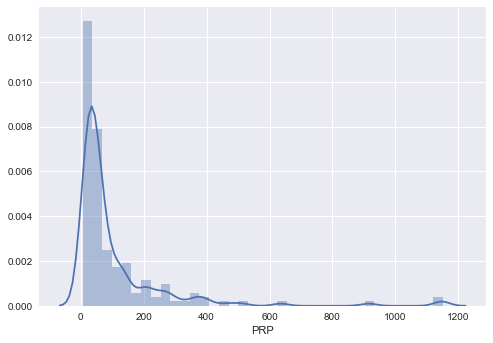

In [4]:
print(y_traindf['PRP'].describe())
# Minimum Performance is larger than zero so we don't have empty values
sns.distplot(y_traindf['PRP']);

Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.

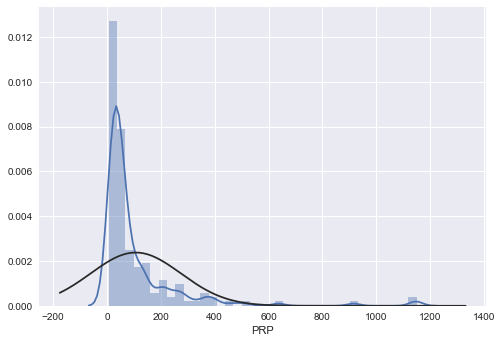

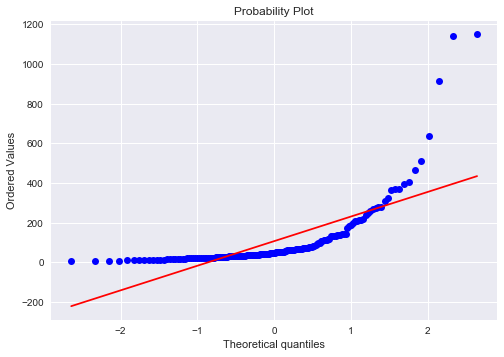

In [5]:
sns.distplot(y_traindf['PRP'], fit=norm);
fig = plt.figure()
res = stats.probplot(y_traindf['PRP'], plot=plt)

In [6]:
y_traindflog = pd.read_csv('y_train.csv')
y_traindflog['PRP'] = np.log(y_traindf['PRP'])

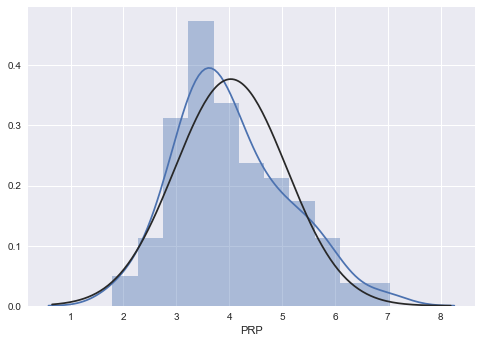

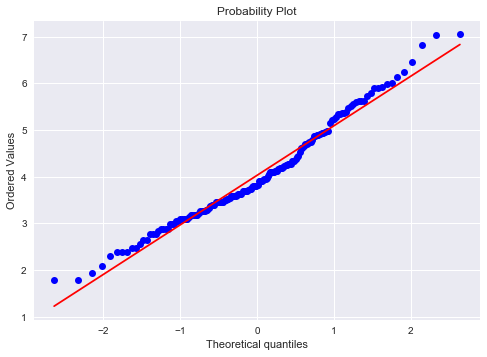

In [7]:
sns.distplot(y_traindflog['PRP'], fit=norm);
fig = plt.figure()
res = stats.probplot(y_traindflog['PRP'], plot=plt)

In [8]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [9]:
model_ridge = Ridge()

In [10]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

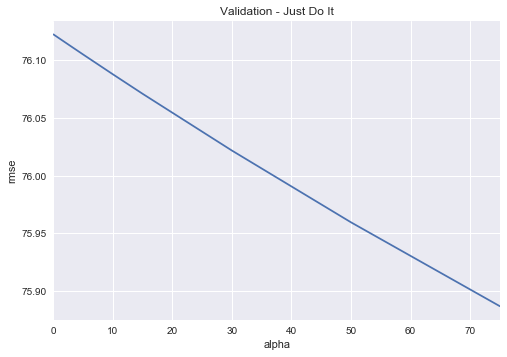

In [11]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

**SIMPLE LINEAR REGRESSION**

In [12]:
#Easy Linear regression. Values are negative so is not correct. We need to normalize it first to find the linear relation.
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [13]:
y_predict = regr.predict(X_test)
print(y_predict)

[  77.64811724   -5.14900668   93.96516664  339.46287713   88.23489811
  -13.59883165   94.48713411   38.70960396  271.53984879  199.11437757
   31.93256642  577.532962     73.15667519  230.82922549  444.87741723
    9.97807406   40.99561298   -6.74167453  -32.87276408   -5.19460371
  -20.72782813   99.44606339  452.23041216   45.9410554    35.21101819
   98.30691306    2.61290018    6.34281005  -21.12898249   42.32172357
   75.85951079   40.63206756   38.29167634  111.01385794  135.49388663
  122.89494729  -12.14308165   53.22506364   -6.09796721  105.20833193
  244.65509804]


#Final export

test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = predictions
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

In [14]:
norm_x = X_train/np.linalg.norm(X_train)
normlog_x = np.log(X_train)
print(normlog_x)

[[  4.82831374   5.54517744   8.69951475   5.54517744   2.77258872
    4.85203026]
 [  3.36729583   8.98719682  10.37349118   3.4657359    2.07944154
    3.4657359 ]
 [  3.36729583   8.98719682  10.37349118   3.4657359    2.07944154
    3.4657359 ]
 ..., 
 [  4.82831374   7.60090246   8.98719682         -inf   0.69314718
    2.63905733]
 [  6.1737861    6.23832463   8.98719682   3.4657359          -inf
          -inf]
 [  6.1737861    6.90775528   8.29404964         -inf         -inf
          -inf]]


C:\Users\ignac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


**Using a DecisionTreeRegression**

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Define model
model = DecisionTreeRegressor()

# Fit model
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [16]:
predictions = (model.predict(X_test))

**Linear model from LAB2**

In [17]:
X = np.c_[np.ones_like(y_train), X_train]
t = y_train

In [18]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)
X_test.shape[0]


[ -6.08322937e+01   5.48384344e-02   1.46668435e-02   6.02011019e-03
   7.12702546e-01  -5.50337227e-01   1.49002601e+00]


41

In [19]:
testX = np.c_[np.ones(X_test.shape[0]), X_test]
testt = np.dot(testX,w)

In [20]:
testt

array([  77.64811724,   -5.14900668,   93.96516664,  339.46287713,
         88.23489811,  -13.59883165,   94.48713411,   38.70960396,
        271.53984879,  199.11437757,   31.93256642,  577.532962  ,
         73.15667519,  230.82922549,  444.87741723,    9.97807406,
         40.99561298,   -6.74167453,  -32.87276408,   -5.19460371,
        -20.72782813,   99.44606339,  452.23041216,   45.9410554 ,
         35.21101819,   98.30691306,    2.61290018,    6.34281005,
        -21.12898249,   42.32172357,   75.85951079,   40.63206756,
         38.29167634,  111.01385794,  135.49388663,  122.89494729,
        -12.14308165,   53.22506364,   -6.09796721,  105.20833193,
        244.65509804])

**Transformation to log and linear regression**
** BEST RESULT YET **
==

In [36]:
X_traindf2 = X_traindf.drop('MYCT', 1)
X_testdf2 = X_testdf.drop('MYCT', 1)
X_traindf2[X_traindf2==0] = 0.00001
X_testdf2[X_testdf2==0] = 0.00001
ylog = np.log(df['PRP'])
xtrainlog = np.log(X_traindf2)
xtestlog = np.log(X_testdf2)

In [37]:
X = np.c_[np.ones_like(ylog), xtrainlog, xtrainlog**2]
t = ylog

In [38]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

[  4.04773745e+00  -4.36072561e-01  -3.60160771e-01   1.30497747e-01
   2.18111814e-02   1.88373759e-01   4.29941488e-02   3.96244828e-02
   1.13429102e-02   2.37209698e-02  -5.78844522e-04]


In [40]:
testX = np.c_[np.ones(xtestlog.shape[0]), xtestlog, xtestlog**2]
testt = np.dot(testX,w)
testt.shape[0]
print(xtestlog.shape)

(41, 5)


In [41]:
import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

[  74.6163589    20.71884126  110.95487886  287.68728587   75.66319272
   15.95979492   68.61366069   22.19426152  160.08209611  166.67366632
   49.86081982  539.82208009   52.9298046   212.80711595  351.72255994
   30.62593746   57.67771811   31.4287661    17.09625524   25.89788465
   15.95979492   51.93776936  407.81927798   43.78108639   46.30656121
   82.15082683   28.36251103   25.75627562   19.59828874   64.38126781
   62.77109166   62.43975925   46.34020021   79.00965083  114.90429399
  106.53671852   23.02942      49.92141327   31.71325524  100.10075134
  191.29105583]


In [42]:
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = myarray

np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

**Implementing Quadratic**

In [73]:
X_traindf2 = X_traindf
X_testdf2 = X_testdf
X_traindf2[X_traindf2==0] = 0.00001
X_testdf2[X_testdf2==0] = 0.00001
ylog = np.log(df['PRP'])
xtrainlog = np.log(X_traindf2)
xtestlog = np.log(X_testdf2)

In [74]:
xtrainlogsq = xtrainlog**2
X = np.c_[np.ones_like(ylog), xtrainlog, xtrainlogsq]
t = ylog

In [89]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

[  4.70016614e+00  -2.83540343e-01  -4.14147464e-01  -3.22953959e-01
   1.27782805e-01   1.24170641e-02   1.88140160e-01   2.45408911e-02
   4.01418018e-02   3.69976936e-02   1.10768304e-02   2.06495295e-02
   1.69829329e-03]


In [90]:
#w[7]=0.00001
#w[8]=0

In [91]:
testX = np.c_[np.ones(xtestlog.shape[0]), xtestlog, xtestlog**2]
testt = np.dot(testX,w)
testt.shape[0]
print(xtestlog.shape)

(41, 6)


In [92]:
import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

[  50.47685884    8.81489053   76.34895404  230.07364398   47.1585231
    6.83376232   33.85128659    6.24755106   86.06121088  114.6055636
   27.2502421   394.26365714   28.29745111  134.50105412  274.06704316
   16.27359368   34.25465268   22.94403262   10.74729472   13.95494488
    7.87591838   25.63263993  324.91151277   25.11619129   25.26693103
   58.10450804   20.2274705     8.65861832   12.44135684   36.78962556
   27.1760248    39.30617395   26.05690217   50.66929522   78.09677732
   69.85677422   12.27570406   43.25649738   16.52893598   69.70501415
  152.7315687 ]


Observing relation between INDEPENDENT variables
==

We can see that MMAX and MMIN are linearly dependent. Calculate mean of them

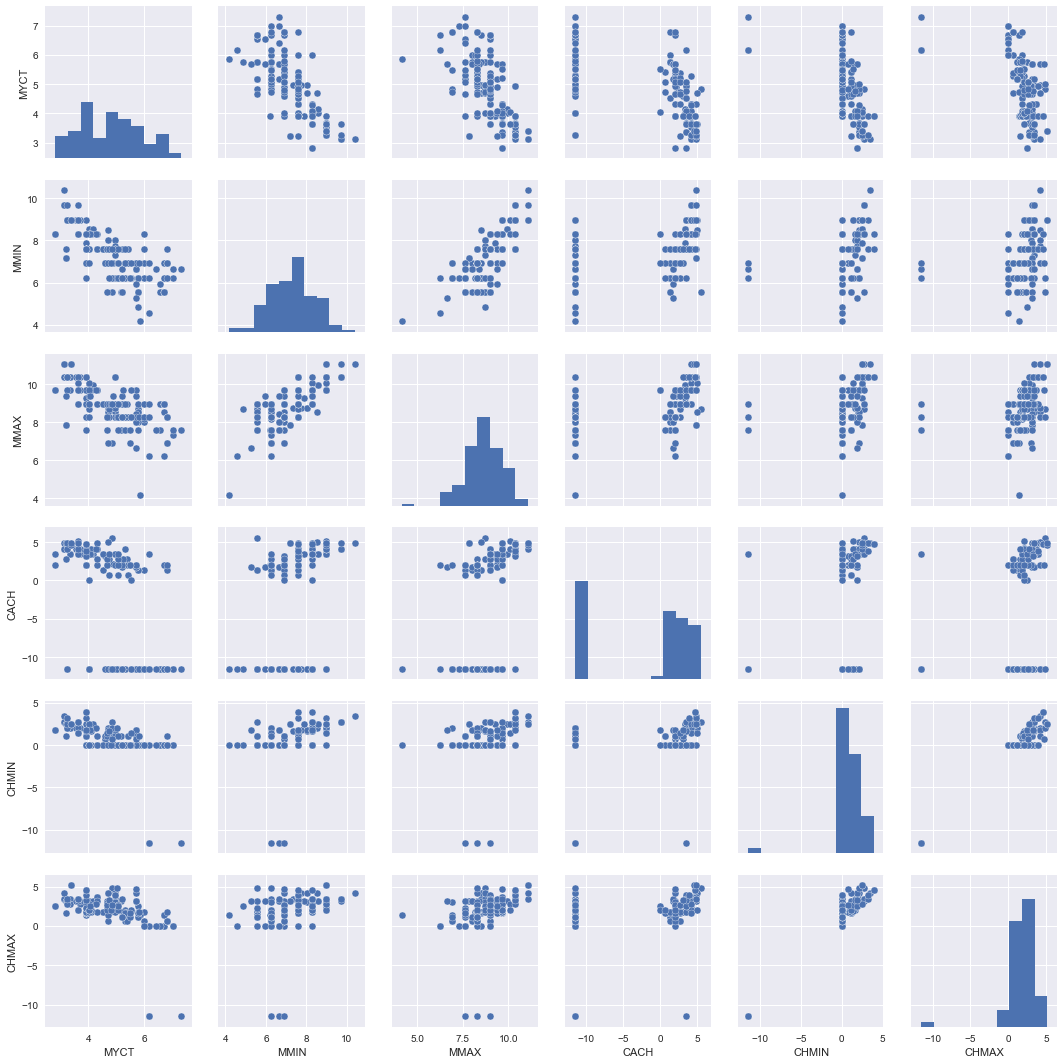

In [99]:
sns.set()
cols = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
sns.pairplot(xtrainlog[cols], size = 2.5)
plt.show();

In [120]:
X_traindf3 = X_traindf
X_testdf3 = X_testdf
X_traindf3[X_traindf==0] = 0.00001
X_testdf3[X_testdf==0] = 0.00001

X_traindf3['MMEAN'] = (X_traindf3["MMAX"] + X_traindf3["MMIN"])/2
X_traindf3 = X_traindf3.drop('MMAX', 1)
X_traindf3 = X_traindf3.drop('MMIN', 1)

X_testdf3['MMEAN'] = (X_testdf3["MMAX"] + X_testdf3["MMIN"])/2
X_testdf3 = X_testdf3.drop('MMAX', 1)
X_testdf3 = X_testdf3.drop('MMIN', 1)

ylog = np.log(df['PRP'])
xtrainlog = np.log(X_traindf3)
xtestlog = np.log(X_testdf3)

xtrainlog["PRP"] = ylog
xtrainlog = (xtrainlog - xtrainlog.mean())/xtrainlog.std()
xtrainlog
xtestlog = (xtestlog - xtestlog.mean())/xtestlog.std()

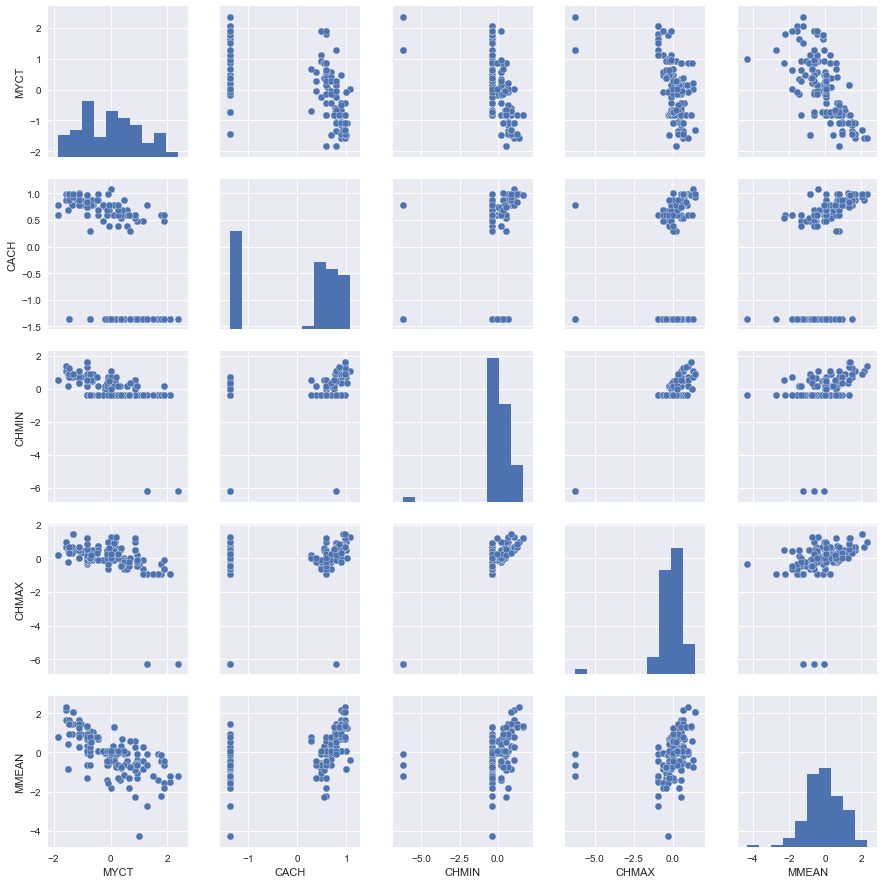

In [114]:
sns.set()
cols = ['MYCT', 'CACH', 'CHMIN', 'CHMAX', 'MMEAN']
sns.pairplot(xtrainlog[cols], size = 2.5)
plt.show();

In [122]:
xtrainlogsq = xtrainlog**2
X = np.c_[np.ones_like(ylog), xtrainlog.drop('PRP',1), xtrainlogsq.drop('PRP',1)]
t = xtrainlog['PRP']

XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print (w)

testX = np.c_[np.ones(xtestlog.shape[0]), xtestlog, xtestlog**2]
testt = np.dot(testX,w)
testt.shape[0]
print(xtestlog.shape)

import math
predictions = []
for i in range(0,testt.shape[0]):
    predictions.append(math.exp( testt[i]))
    
    
myarray = np.asarray(predictions)
print(myarray)

test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = myarray

np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

[-0.70685089 -0.08928989  0.55655932  0.10874083  0.36057519  0.46156561
  0.03348827  0.52861306  0.06905766  0.01257143  0.06735311]
(41, 5)
[ 1.11375274  0.49861269  1.44425787  3.72243318  1.02808325  0.4098264
  1.01725577  0.25589538  2.24343661  2.22181633  0.74230731  5.69558172
  0.92308378  2.31149153  4.08807122  0.66753465  0.891045    0.54791314
  0.44470513  0.5717349   0.41348524  1.25535119  4.5512022   0.77684753
  0.61910597  1.28225965  0.71093696  0.27021133  0.498673    0.84648934
  0.90386864  0.90113825  0.7101769   0.99734935  1.58367781  1.61947773
  0.38579903  0.9649011   0.46590056  1.50221979  2.57176694]
